In [1]:
import re
import pandas as pd
from textblob import TextBlob
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('Data/posts.csv')

In [3]:
df['category'] = df.apply(
    lambda row: 'Computer Technology|Programming languages|Design and Analysis of Algorithms' if pd.isnull(row['category']) and ('fsm' in row['title'].lower() or 'p.h.p' in row['title'].lower() or 'php' in row['title'].lower() or '.net' in row['title'].lower()) else row['category'],
    axis=1)
df['category'] = df.apply(
    lambda row: 'Photograhy' if pd.isnull(row['category']) and ('photography' in row['title'].lower()) else row['category'],
    axis=1)
df['category'] = df.apply(
    lambda row: 'Fashion Trends' if pd.isnull(row['category']) and ('lifestyle' in row['title'].lower()) else row['category'],
    axis=1)
df['category'] = df.apply(
    lambda row: 'Networking' if pd.isnull(row['category']) and ('networking' in row['title'].lower()) else row['category'],
    axis=1)
df['category'] = df.apply(
    lambda row: 'Computer Technology' if pd.isnull(row['category']) and ('srs' in row['title'].lower() or 'camd' in row['title'].lower()) else row['category'],
    axis=1)
df['category'] = df.apply(
    lambda row: 'Computer Technology|Design and Analysis of Algorithms' if pd.isnull(row['category']) and ('bfs' in row['title'].lower()) else row['category'],
    axis=1)
df['category'] = df.apply(
    lambda row: 'Computer Technology|Machine Learning|Artifical Intelligence' if pd.isnull(row['category']) and ('recommend' in row['title'].lower() or 'gan' in row['title'].lower()) else row['category'],
    axis=1)
df['category'] = df.apply(
    lambda row: 'Operating Systems' if pd.isnull(row['category']) and ('os' in row['title'].lower()) else row['category'],
    axis=1)
df['category'] = df['category'].str.lower().str.replace('\W', ' ')
backup_copy = df.copy()

In [4]:
df['category'] = df['category'].str.lower().str.split().apply(set).apply(list)
df['category'] = df['category'].apply(lambda row: ' '.join(map(str,row)))

In [6]:
titles_list = df.title.to_list()
category_list = df.category.to_list()
post_list = list(zip(titles_list, category_list))
# len(post_list)

493

In [7]:
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

def return_category(list_posts):
    return [x[1] for x in list_posts]
        

vec = TfidfVectorizer(tokenizer=textblob_tokenizer, stop_words='english', use_idf=True)
matrix = vec.fit_transform(return_category(post_list))
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df

C:\Users\Aayush.Ayush_PC\anaconda3\envs\TF_openCV\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] n

,2d,abus,account,acryl,activ,advertis,agreement,algebra,algorithm,altern,...,typographi,ventur,video,videographi,visual,watercolour,web,wood,work,zoolog
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
model_tf_idf = NearestNeighbors(metric='cosine', algorithm='brute')
model_tf_idf.fit(matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [9]:
def print_nearest_neighbors(query_tf_idf, postdic, knn_model, k):
    """
    Inputs: a query tf_idf vector, the dictionary of posts, the knn model, and the number of neighbors
    Prints the k nearest neighbors
    """
    distances, indices = knn_model.kneighbors(query_tf_idf, n_neighbors = k+1)
    nearest_neighbors = [post_list[x] for x in indices.flatten()]
    
    for post in range(len(nearest_neighbors)):
        if post == 0:
            print('Post: {0}\n'.format(nearest_neighbors[post]))
        else:
            print('{0}: {1}\n'.format(post, nearest_neighbors[post]))

In [11]:
post_id = np.random.choice(matrix.shape[0])
print_nearest_neighbors(matrix[post_id], post_list, model_tf_idf, k=5)

Post: ('Computer Aided Machine Drawing (CAMD)', 'technology computer')

1: ('Library Managment System: Software Requirement Specification (SRS)', 'technology computer')

2: ('SEO (Search Engine Optimization)', 'computation technology computer')

3: ('Printers', 'computation technology computer')

4: ('Raster graphics systems', 'computation application technology computer')

5: ('Cloud Computing', 'technology cloud computer computing')



In [12]:
k=60
km = KMeans(n_clusters=k)#, init='k-means++', max_iter=100, n_init=5,verbose=1)
km.fit(matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=60, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

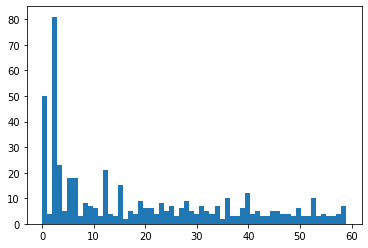

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(km.labels_, bins=k)
plt.show()

In [14]:
cluster_assignments_dict = {}
for i in set(km.labels_):
    current_cluster_posts = [post_list[x] for x in np.where(km.labels_ == i)[0]]
    cluster_assignments_dict[i] = current_cluster_posts

cluster_pick = np.random.choice(len(set(km.labels_)))
print('Cluster {0}'.format(cluster_pick))
cluster_assignments_dict[cluster_pick]

In [17]:
def find_post(query, list_of_posts):
    for i in list_of_posts:
        if post.lower() in i[0].lower():
            return list_of_posts.index(i)
#         if all(elem in i[0] for elem in query.lower().split()):
#             return list_post.index(i)
    return -1
            

In [18]:
def get_cluster_number(post, list_of_posts, model):
    return model.labels_[find_post(post, list_of_posts)]

In [19]:
post = input('Enter Post to show similar posts: ')
cluster_assignments_dict[get_cluster_number(post, post_list, km)]

Enter Post to show similar posts: Shiva


[('Lord Shiva', 'drawings'),
 ('Trident', 'drawings'),
 ('Lord shiva', 'drawings'),
 ('Kid Bu', 'drawings'),
 ('Shadow Sketch', 'drawings'),
 ('The Chosen', 'drawings'),
 ('Spartan', 'drawings'),
 ('ROMAN REIGNS', 'drawings'),
 ('OM', 'drawings'),
 ('MK Swords', 'drawings'),
 ('Making of the Joker sketch', 'drawing'),
 ('Hand art', 'drawing'),
 ('Mahakaal', 'drawings'),
 ('Mahakaal', 'drawing'),
 ('Morning nectar', 'drawings'),
 ("I am just hoping we'll have cake by the ocean", 'drawings'),
 ('Sketch', 'drawings'),
 ('The legend', 'drawings'),
 ('The sorting hat', 'drawings'),
 ('Tea!', 'drawings'),
 ('You are late.', 'drawings'),
 ('Fight: Against Corona virus', 'drawings'),
 ('Shiva Portrait', 'drawings'),
 ('Inside life', 'drawings'),
 ('Painting', 'drawings'),
 ('Piglet', 'drawings'),
 ('BEING CREATIVE☺☺', 'drawings'),
 ('Time', 'drawings'),
 ('Doodles woodles!', 'drawings'),
 ('Love binds', 'drawings'),
 ("No one's worth hate🧡", 'drawings'),
 ('Shivshakti', 'drawings'),
 ('Women: 